In [1]:
import numpy as np
from glob import glob
from pathlib import Path
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.signal import stft, resample
from processing import feature_extraction, visualize_mfccs, apply_notch_filter_to_directory
from codebook import Codebook
import os

# Test 1

In [2]:
data_folder = Path().resolve() / "Audio Files"

given_test_files = glob(f'{data_folder}\Given Test\*.wav')
given_train_files = glob(f'{data_folder}\Given Train\*.wav')

### Given Training

In [3]:
given_train_arrays = []
for file_path in given_train_files:
    sample_rate, audio_data = wavfile.read(file_path)
    given_train_arrays.append(np.array(audio_data))
    #print(f"Shape of audio data for {file_path}: {audio_data.shape}")
print(f"Number of audio files: {len(given_train_arrays)}")
print(sample_rate)

Number of audio files: 11
12500


In [5]:
recording_num = 8
Audio(given_train_arrays[recording_num], rate=sample_rate)

### Given Testing

In [6]:
given_test_arrays = []
for file_path in given_test_files:
    try:
        sample_rate, audio_data = wavfile.read(file_path)
        given_test_arrays.append(np.array(audio_data))
    except:
        print(f"Error in file: ",file_path)
print(f"Number of audio files: {len(given_test_arrays)}")

Number of audio files: 8


In [7]:
recording_num = 6
Audio(given_test_arrays[recording_num], rate=sample_rate)

# Test 2: Play a sound, plot, and answer how long 256 samples is

Sample rate: 12000
Milliseconds in 256 samples: 21.333333333333332


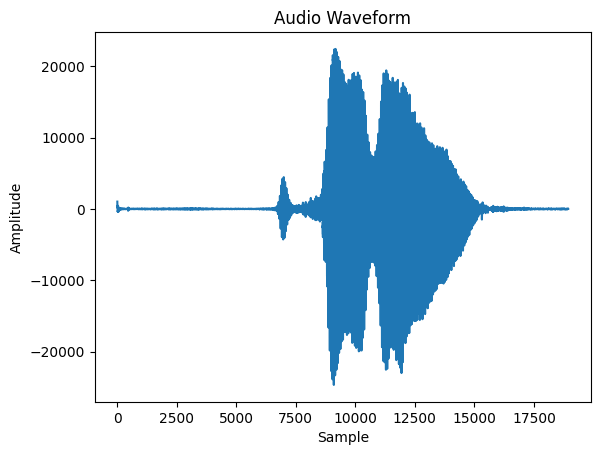

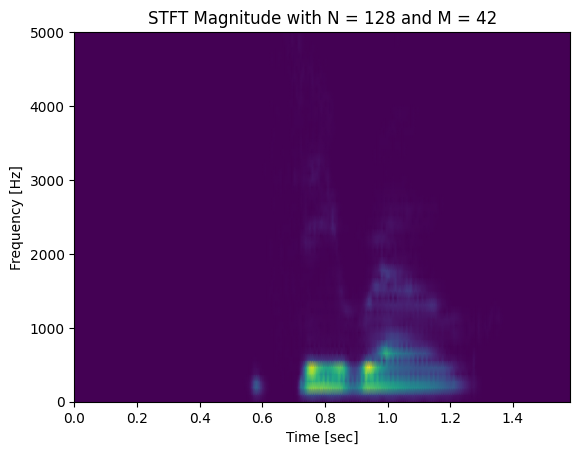

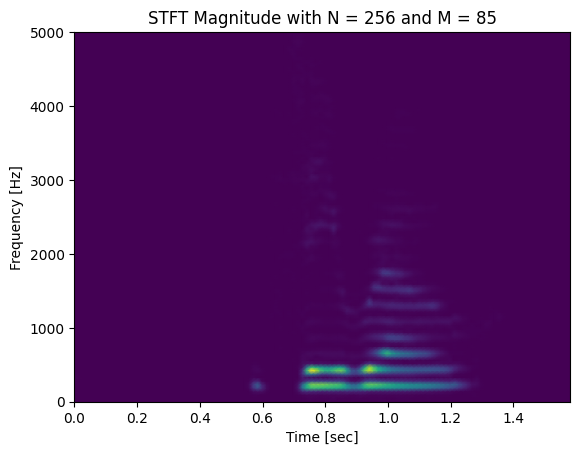

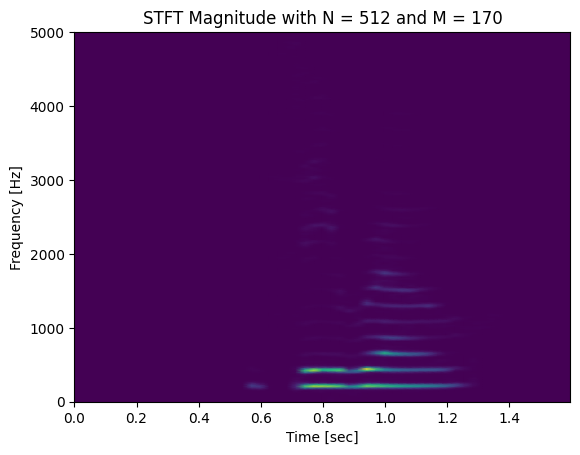

In [9]:
arrays = {
    'given_train': given_train_arrays,
    'given_test': given_test_arrays
}

chosen_array = 'given_test'
chosen_sample = 2

currentData = arrays[chosen_array][chosen_sample]

print(f"Sample rate: {sample_rate}")
numSamples = 256
mseconds = numSamples/sample_rate * 1000
print(f"Milliseconds in 256 samples: {mseconds}")

plt.plot(currentData)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

# STFT
frame_sizes = [128, 256, 512]
for N in frame_sizes:
    M = N // 3
    f, t, Zxx = stft(currentData, fs=sample_rate, nperseg=N, noverlap=M)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title(f'STFT Magnitude with N = {N} and M = {M}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim(0, 5000)
    plt.show()

# Test 3: Mel Spectrum

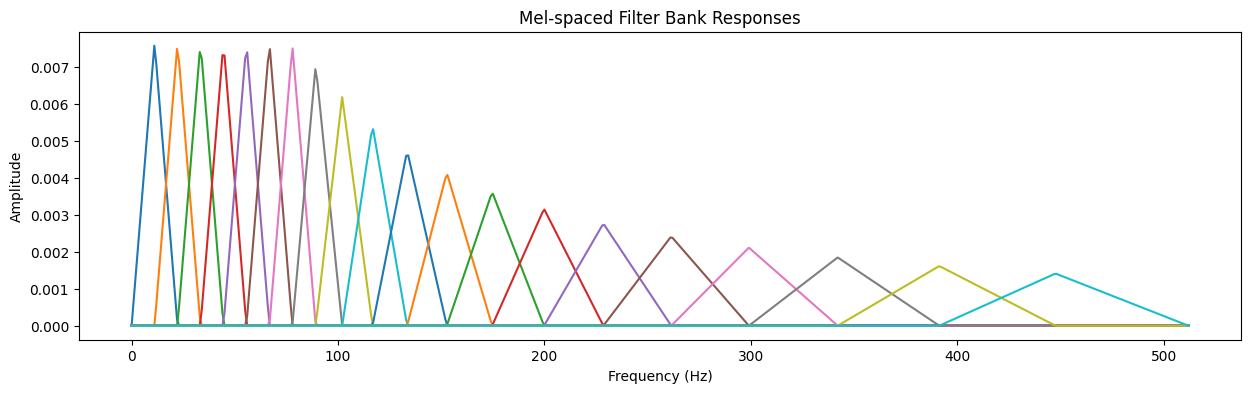

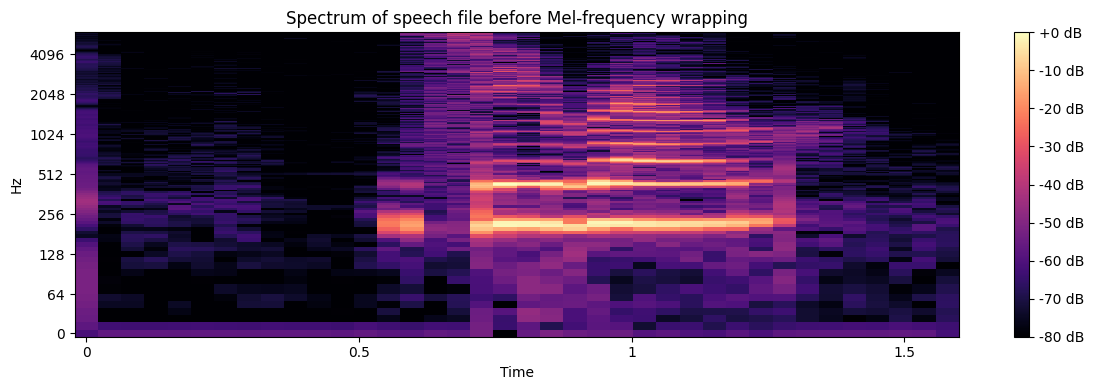

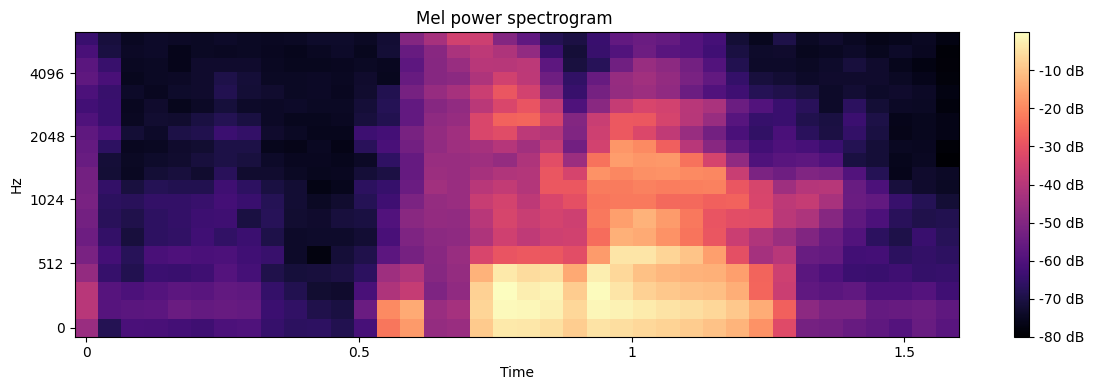

In [10]:
from librosa.feature import mfcc, melspectrogram 
from librosa.filters import mel
from librosa.core import power_to_db
import librosa.display

N = 1024
M = 512
K = 20

currentData = currentData.astype(np.float32)

# Create the filter bank
mel_filter_bank = librosa.filters.mel(sr=sample_rate, n_fft=N, n_mels=K)

# Plot the filter bank
plt.figure(figsize=(15, 4))
for i in range(K):
    plt.plot(mel_filter_bank[i])
plt.title('Mel-spaced Filter Bank Responses')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

frequencies, times, Zxx = stft(currentData, fs=sample_rate, nperseg=N, noverlap=M)

D_log = librosa.amplitude_to_db(np.abs(Zxx), ref=np.max)

# Plot the spectrum
plt.figure(figsize=(12, 4))
librosa.display.specshow(D_log, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrum of speech file before Mel-frequency wrapping')
plt.tight_layout()
plt.show()

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=currentData, sr=sample_rate, n_fft=N, hop_length=M, n_mels=K)


# Convert to log scale (dB).
log_S = librosa.core.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))

librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')

#formatting
plt.title('Mel power spectrogram ')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()
plt.show()

# Test 4: Cepstrum
feature_extraction function in processing.py

# Test 5 and 6: Acoustic Space and Centroid Plotting

C:\Users\Conor King\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


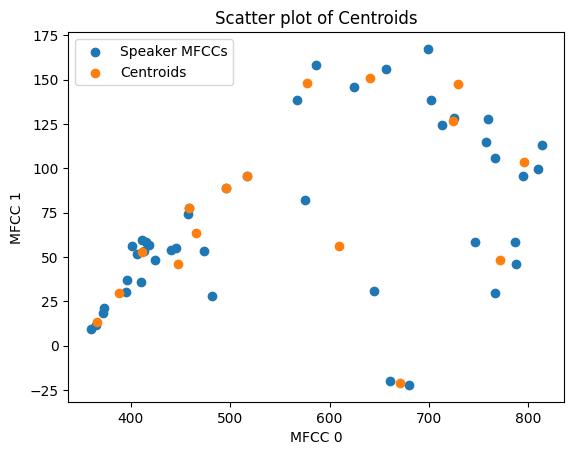

In [11]:
N = 1024
M = 409
n_mfcc = 40
size_codebook = 16

x_MFCC = 0
y_MFCC = 1

speaker_mfccs = feature_extraction(audio=currentData, N = N,M=M,sampling_rate=sample_rate,n_mfcc=n_mfcc)

ax = visualize_mfccs(mfcc_features=speaker_mfccs,mfcc_x=x_MFCC,mfcc_y=y_MFCC)

currentCodebook = Codebook(speaker_mfccs, size_codebook=size_codebook)

currentCodebook.plot_codebook(x_MFCC,y_MFCC,ax)

ax.legend()
plt.show()

# Test 7: Recognition Rate 1

In [12]:
from codelibrary import CodeLibrary

given_Library = CodeLibrary()

N=256
M=100
n_mfcc=40

trainPath = "C:\\Users\\Conor King\\Documents\\School\\201\\Speaker-Recognition\\Audio Files\\Given Train"
savePath = "C:\\Users\\Conor King\\Documents\\School\\201\\Speaker-Recognition\\Codebooks\\Given"

given_Library.createLibrary(audio_folder = trainPath,save_folder=savePath,N=N,M=M,n_mfcc=n_mfcc,size_codebook=64)

given_test_files = glob(f'{data_folder}\Given Test\*.wav')

given_accuracy = given_Library.getAccuracy(given_test_files,N=N,M=M,n_mfcc=n_mfcc)
print(given_accuracy)

C:\Users\Conor King\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=256
  warnings.warn(


1.0


# Test 8: Notch Filter

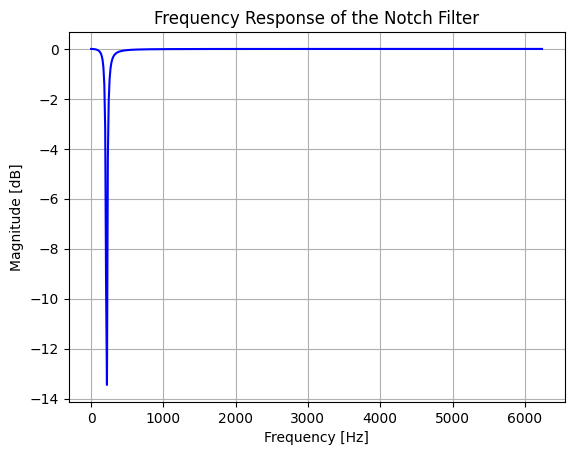

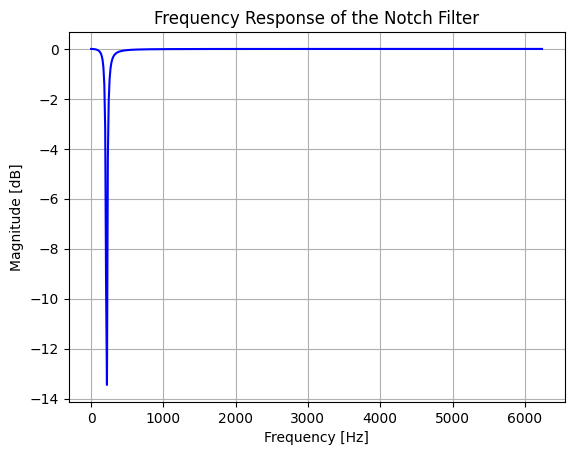

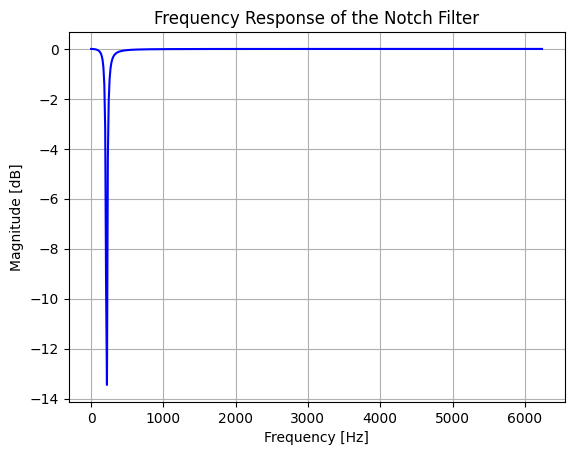

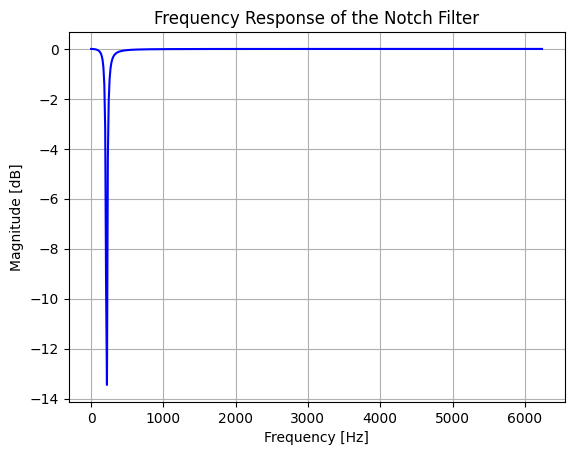

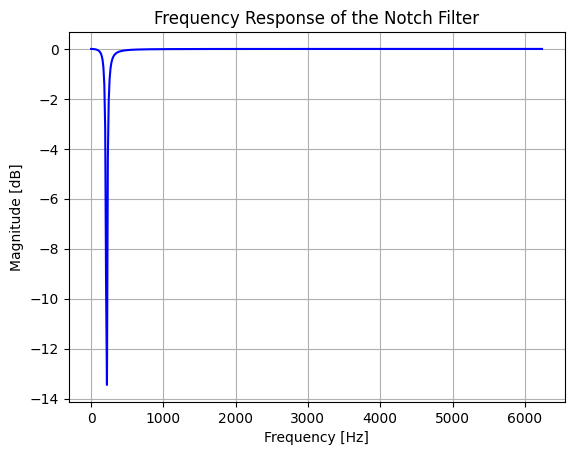

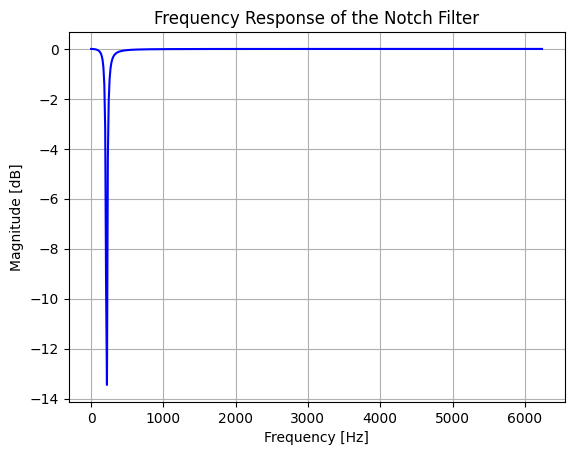

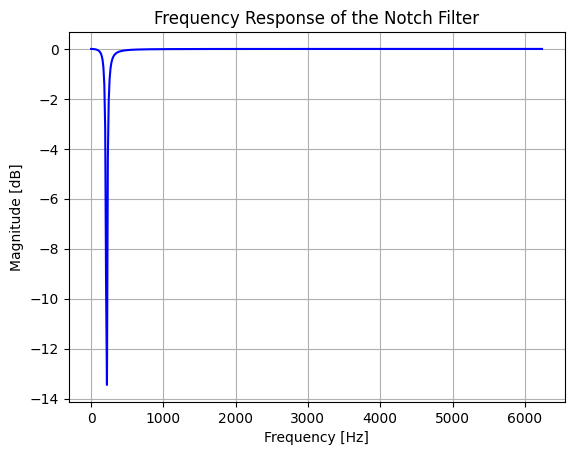

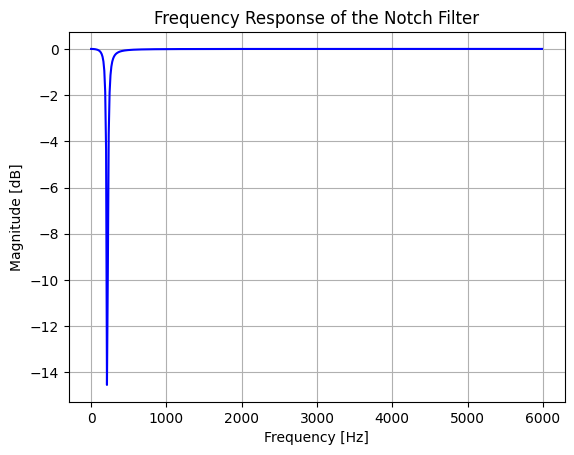

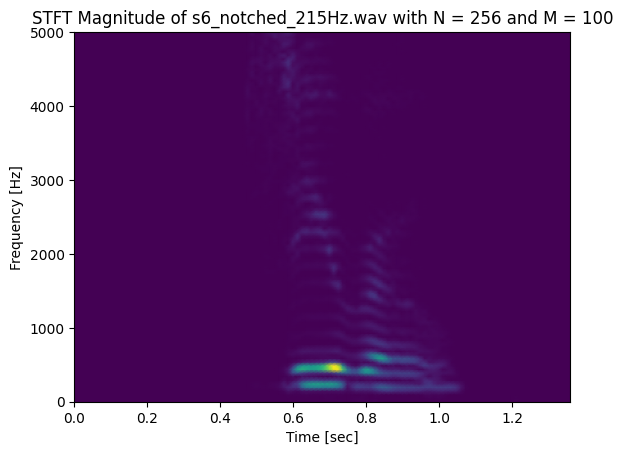

1.0


In [13]:
testData =  "C:\\Users\\Conor King\\Documents\\School\\201\\Speaker-Recognition\\Audio Files\\Given Test"
notchedTestPath = "C:\\Users\\Conor King\\Documents\\School\\201\\Speaker-Recognition\\Audio Files\\Notched Given"

notchFreq = 215

apply_notch_filter_to_directory(input_directory = testData, output_directory = notchedTestPath, notch_freq = notchFreq, Q = 5)

# Get a list of all .wav files in the output directory
output_files = [f for f in os.listdir(notchedTestPath) if f.endswith('.wav')]

fileNum = 5

output_file = output_files[fileNum]

output_filepath = os.path.join(notchedTestPath, output_file)

# Read the audio file
sampling_rate, audio_data = wavfile.read(output_filepath)

# Compute the STFT
f, t, Zxx = stft(audio_data, fs=sampling_rate, nperseg=N, noverlap=M)

# Plot the STFT magnitude
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title(f'STFT Magnitude of {output_file} with N = {N} and M = {M}')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 5000)
plt.show()

given_test_files = glob(f'{data_folder}\\Notched Given\\*.wav')

given_accuracy = given_Library.getAccuracy(given_test_files,N=N,M=M,n_mfcc=n_mfcc)
print(given_accuracy)

# Test 9: Adding Class Audio
1 7 8 9 11 12 15 17 18 19

In [14]:
from codelibrary import CodeLibrary

test9_Library = CodeLibrary()

N=1024
M=409
n_mfcc=40

trainPath = "C:\\Users\\Conor King\\Documents\\School\\201\\Speaker-Recognition\\Audio Files\\Task 9 Train"
savePath = "C:\\Users\\Conor King\\Documents\\School\\201\\Speaker-Recognition\\Codebooks\\Task 9"

given_Library.createLibrary(audio_folder = trainPath,save_folder=savePath,N=N,M=M,n_mfcc=n_mfcc,size_codebook=64)

given_test_files = glob(f'{data_folder}\Task 9 Test\*.wav')

given_accuracy = given_Library.getAccuracy(given_test_files,N=N,M=M,n_mfcc=n_mfcc)
print(given_accuracy)

0.8333333333333334


# Test 10: Final Tests

### Question 1

In [16]:
from codelibrary import CodeLibrary

given_Library = CodeLibrary()

N=1024
M=409
n_mfcc=40

trainPath = "C:\\Users\\Conor King\\Documents\\School\\201\\Speaker-Recognition\\Audio Files\\Twelve Train"
savePath = "C:\\Users\\Conor King\\Documents\\School\\201\\Speaker-Recognition\\Codebooks\\Twelve"

given_Library.createLibrary(audio_folder = trainPath,save_folder=savePath,N=N,M=M,n_mfcc=n_mfcc,size_codebook=64)

given_test_files = glob(f'{data_folder}\Twelve Test\*.wav')

given_accuracy = given_Library.getAccuracy(given_test_files,N=N,M=M,n_mfcc=n_mfcc)
print(given_accuracy)

C:\Users\Conor King\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\Conor King\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


### Question 2
#### a)